# R-Initialization

### R-Package Download

In [18]:
library(ggplot2) # For Plot Visualizations
library(car) # For Variance Inflation Factor function -- vif()
library(corrplot) # For Correlation Visualizations
library(data.table) # For Complex Data Frame Joins

# Data Initialization

### Data Download

In [268]:
# Downloading Vaccination Data
vaccinations = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")))

# Downloading Testing Data
testing = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv")))

# Downloading Hospitalization Data
hospitalization = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv")))

# Downloading Hospitalization Data
deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths_per_million.csv")))
# deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv")))



In [269]:
head(vaccinations)
head(testing)
head(hospitalization)
head(deaths)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,Date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA


entity,iso_code,date,indicator,value
Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
Algeria,DZA,2020-07-20,Daily ICU occupancy per million,1.425


date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua.and.Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis.and.Futuna,Yemen,Zambia,Zimbabwe
2020-01-22,0.000,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-23,0.000,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-24,0.001,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-25,0.002,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-26,0.002,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-27,0.003,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Data Cleanup

In [273]:
# Restructure testing
testing <- transform(testing,location=sub(" .*", "", Entity)) # Creates location column, using regex on Entity column
colnames(testing)[colnames(testing)=="Date"]="date" # Renames Date column to date

In [280]:
# Restructure hospitalization
colnames(hospitalization)[colnames(hospitalization)=="entity"]="location" # Renames Date column to date
hospitalization = hospitalization[hospitalization[,4]=="Daily ICU occupancy",]
colnames(hospitalization)[colnames(hospitalization)=="value"]="icu_daily" # Renames value column to icu_daily

In [281]:
# Restructure deaths !!! NOTE: ONLY RUN ONCE PER DATA DOWNLOAD !!!
countries = colnames(deaths[-1]) # List of countries in deaths
dates = deaths[1] # List of dates in deaths
n_countries = length(countries) # Number of countries
n_dates = length(dates[,1]) # Number of dates

q = data.frame(date=rep(dates[,1],n_countries), # Sets date column equal to vector of dates in sequential order, repeating n_countries times
                location=rep(countries,each=n_dates), # Sets location column to list of countries, each repeated n_dates times
                deaths_per_mil=rep(NA,n_dates*n_countries)) # Sets NA for deaths_per_mil column

for (i in 1:n_countries) { # Loop for each unique country
    for (j in 1:n_dates) { # Loop for each unique date
        q$deaths_per_mil[(i-1)*n_dates+j] = deaths[j,i+1] # Sets the NA value in deaths_per_mil at row
        # (Current Country # - 1) * n_dates + Current Date # = deaths[Current Date #, Current Country # + Table Offset]
    }
}

deaths = q # Changes deaths data table to the reformatted data frame for further processing

In [282]:
head(testing)
head(hospitalization)
head(deaths)
# hospitalization

Entity,ISO.code,date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case,location
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan


,location,iso_code,date,indicator,icu_daily
1,Algeria,DZA,2020-07-17,Daily ICU occupancy,62
3,Algeria,DZA,2020-07-18,Daily ICU occupancy,67
5,Algeria,DZA,2020-07-20,Daily ICU occupancy,64
7,Algeria,DZA,2020-07-21,Daily ICU occupancy,56
9,Algeria,DZA,2020-07-22,Daily ICU occupancy,51
11,Algeria,DZA,2020-07-23,Daily ICU occupancy,66


date,location,deaths_per_mil
2020-01-22,World,0.000
2020-01-23,World,0.000
2020-01-24,World,0.001
2020-01-25,World,0.002
2020-01-26,World,0.002
2020-01-27,World,0.003


# Data Analyses

### Method 1:

We are looking purely at the deaths as a function of everything else. This being `Date`, `Location`, `Daily Testing`, `Daily ICU Occipancy`. We are looking at this as a density, to allow for better comparison between countries of different population magnitudes. We merge our data into a set:

In [310]:
data.method1 = merge(x=deaths,y=vaccinations,by=c("location","date")) # Merges deaths & vaccinations data on Location and Date
data.method1 = merge(x=data.method1,y=testing,by=c("location","date")) # Merges testing data on Location and Date
data.method1 = merge(x=data.method1,y=hospitalization,by=c("location","date")) # Merges hospitalization data on Location and Date

colnames(data.method1)
# head(data.method1,100)
data.method1 <- data.frame(date=data.method1$date,location=data.method1$location,
                           deaths_daily_per_mil=data.method1$deaths_per_mil,tests_daily_per_thd=data.method1$Daily.change.in.cumulative.total.per.thousand,
                           icu_daily=data.method1$icu_daily,vax_daily_per_mil=data.method1$daily_vaccinations_per_million)

sum(is.na(data.method1$deaths_daily_per_mil))
sum(!is.na(data.method1$deaths_daily_per_mil))
data.method1 = na.omit(data.method1)
data.method1

[1] "location"                                     
 [2] "date"                                         
 [3] "deaths_per_mil"                               
 [4] "iso_code.x"                                   
 [5] "total_vaccinations"                           
 [6] "people_vaccinated"                            
 [7] "people_fully_vaccinated"                      
 [8] "total_boosters"                               
 [9] "daily_vaccinations_raw"                       
[10] "daily_vaccinations"                           
[11] "total_vaccinations_per_hundred"               
[12] "people_vaccinated_per_hundred"                
[13] "people_fully_vaccinated_per_hundred"          
[14] "total_boosters_per_hundred"                   
[15] "daily_vaccinations_per_million"               
[16] "daily_people_vaccinated"                      
[17] "daily_people_vaccinated_per_hundred"          
[18] "Entity"                                       
[19] "ISO.code"                                     
[20] "Source.URL"                                   
[21] "Source.label"                                 
[22] "Notes"                                        
[23] "Cumulative.total"                             
[24] "Daily.change.in.cumulative.total"             
[25] "Cumulative.total.per.thousand"                
[26] "Daily.change.in.cumulative.total.per.thousand"
[27] "X7.day.smoothed.daily.change"                 
[28] "X7.day.smoothed.daily.change.per.thousand"    
[29] "Short.term.positive.rate"                     
[30] "Short.term.tests.per.case"                    
[31] "iso_code.y"                                   
[32] "indicator"                                    
[33] "icu_daily"

[1] 43

[1] 13376

,date,location,deaths_daily_per_mil,tests_daily_per_thd,icu_daily,vax_daily_per_mil
3,2020-12-30,Argentina,3.186,1.149,3440,442
4,2021-01-02,Argentina,1.230,0.663,3438,145
5,2021-01-03,Argentina,2.351,0.568,3433,118
6,2021-01-04,Argentina,3.340,1.115,3502,136
7,2021-01-05,Argentina,3.318,1.200,3460,151
8,2021-01-06,Argentina,4.197,1.240,3460,119
9,2021-01-07,Argentina,3.208,1.194,3559,168
10,2021-01-08,Argentina,3.318,1.209,3559,255
11,2021-01-09,Argentina,3.164,0.979,3597,277
12,2021-01-10,Argentina,1.714,0.592,3612,279


In [313]:
lm_method1 = lm(data=data.method1, deaths_daily_per_mil~.)
summary(lm_method1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method1)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.238  -1.339  -0.278   0.802  50.498 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.610e-01  2.781e+00  -0.166    0.868    
date2020-12-16       5.398e-01  3.922e+00   0.138    0.891    
date2020-12-17       1.030e+00  3.922e+00   0.263    0.793    
date2020-12-18       3.305e-01  3.922e+00   0.084    0.933    
date2020-12-19      -6.720e-01  3.397e+00  -0.198    0.843    
date2020-12-20      -4.192e-01  3.203e+00  -0.131    0.896    
date2020-12-21      -7.395e-01  3.203e+00  -0.231    0.817    
date2020-12-22       1.808e+00  3.102e+00   0.583    0.560    
date2020-12-23       1.899e+00  3.102e+00   0.612    0.540    
date2020-12-24       1.598e+00  3.102e+00   0.515    0.606    
date2020-12-25       5.648e-01  3.040e+00   0.186    0.853    
date2020-12-26       9.185e-01  3.040e+00   0.302    0.763    
date2

Warning message:
“not plotting observations with leverage one:
  1476, 2448, 2449, 2450, 2451”Warning message:
“not plotting observations with leverage one:
  1476, 2448, 2449, 2450, 2451”

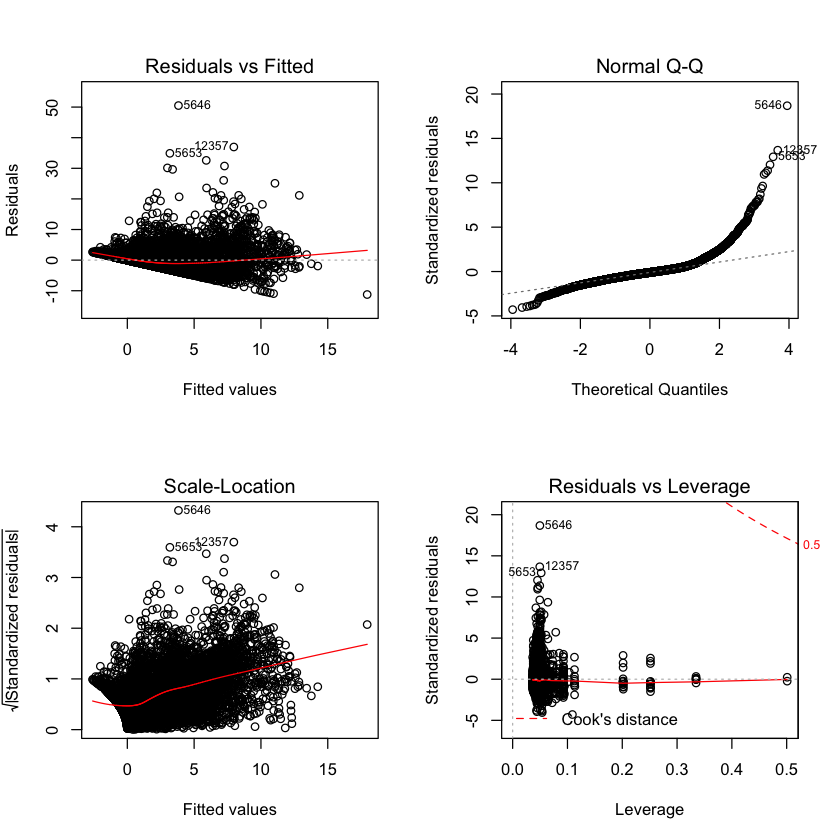

In [314]:
par(mfrow=c(2,2))
plot(lm_method1)